In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.tools.plotting import scatter_matrix
%matplotlib inline

In [2]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

## 1. 数据预处理

In [3]:
beer = pd.read_csv('data.txt', sep=' ')
beer.head(3)

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48


In [4]:
# 聚类特征为所有X的所有特征

X = beer[["calories", "sodium", "alcohol", "cost"]]

## 2. K-Means

In [5]:
km1 = KMeans(n_clusters=2).fit(X)
km2 = KMeans(n_clusters=3).fit(X)

In [6]:
print("km1.label: ", km1.labels_)
print("km2.label: ", km2.labels_)

km1.label:  [0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1]
km2.label:  [1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 2 1 1 2 0]


In [7]:
beer['cluster1'] = km1.labels_
beer['cluster2'] = km2.labels_
beer.sort_values('cluster1')

,name,calories,sodium,alcohol,cost,cluster1,cluster2
0,Budweiser,144,15,4.7,0.43,0,1
1,Schlitz,151,19,4.9,0.43,0,1
2,Lowenbrau,157,15,0.9,0.48,0,1
3,Kronenbourg,170,7,5.2,0.73,0,1
4,Heineken,152,11,5.0,0.77,0,1
5,Old_Milwaukee,145,23,4.6,0.28,0,1
6,Augsberger,175,24,5.5,0.40,0,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1
16,Hamms,139,19,4.4,0.43,0,1


In [8]:
cluster_centers_1 = km1.cluster_centers_
cluster_centers_2 = km2.cluster_centers_

In [9]:
beer.groupby("cluster1").mean()

,calories,sodium,alcohol,cost,cluster2
cluster1,,,,,
0,150.000000,17.000000,4.521429,0.520714,1.000000
1,91.833333,10.166667,3.583333,0.433333,0.666667


In [10]:
beer.groupby("cluster2").mean()

,calories,sodium,alcohol,cost,cluster1
cluster2,,,,,
0,102.75,10.0,4.075000,0.440000,1
1,150.00,17.0,4.521429,0.520714,0
2,70.00,10.5,2.600000,0.420000,1


### 可视化聚类效果

In [11]:
centers = beer.groupby("cluster2").mean().reset_index()

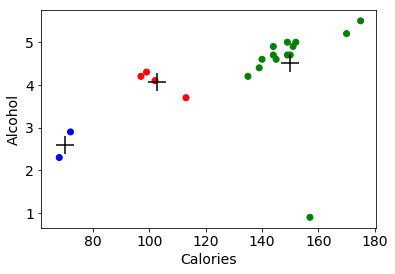

In [12]:
plt.rcParams['font.size'] = 14
colors = np.array(['red', 'green', 'blue', 'yellow'])

plt.scatter(beer["calories"], beer["alcohol"],c=colors[beer["cluster2"]])
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')
plt.xlabel("Calories")
plt.ylabel("Alcohol")

C:\Users\18917\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


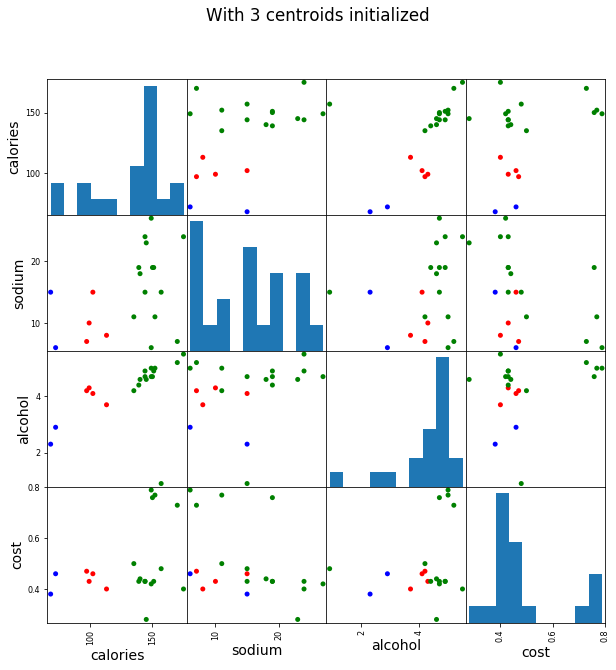

In [13]:
scatter_matrix(beer[["calories","sodium","alcohol","cost"]], s=100, alpha=1, c=colors[beer["cluster2"]], figsize=(10,10))
plt.suptitle("With 3 centroids initialized")

C:\Users\18917\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


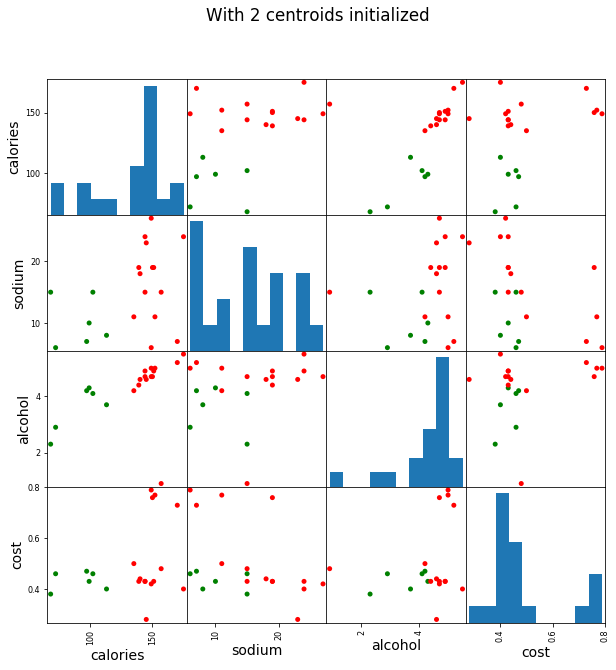

In [14]:
scatter_matrix(beer[["calories","sodium","alcohol","cost"]], s=100, alpha=1, c=colors[beer["cluster1"]], figsize=(10,10))
plt.suptitle("With 2 centroids initialized")

### 归一化数据

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

km = KMeans(n_clusters=3).fit(X_scaled)

In [16]:
beer["scaled_cluster"] = km.labels_
beer.sort_values("scaled_cluster")

,name,calories,sodium,alcohol,cost,cluster1,cluster2,scaled_cluster
0,Budweiser,144,15,4.7,0.43,0,1,0
1,Schlitz,151,19,4.9,0.43,0,1,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1,0
16,Hamms,139,19,4.4,0.43,0,1,0
5,Old_Milwaukee,145,23,4.6,0.28,0,1,0
6,Augsberger,175,24,5.5,0.40,0,1,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1,0
10,Coors,140,18,4.6,0.44,0,1,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1,2,1
12,Michelob_Light,135,11,4.2,0.50,0,1,1


In [17]:
beer.groupby("scaled_cluster").mean()

,calories,sodium,alcohol,cost,cluster1,cluster2
scaled_cluster,,,,,,
0,148.375,21.125,4.7875,0.4075,0.00,1.00
1,105.375,10.875,3.3250,0.4475,0.75,0.75
2,155.250,10.750,4.9750,0.7625,0.00,1.00


C:\Users\18917\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000202323EC3C8>,
      dtype=object)

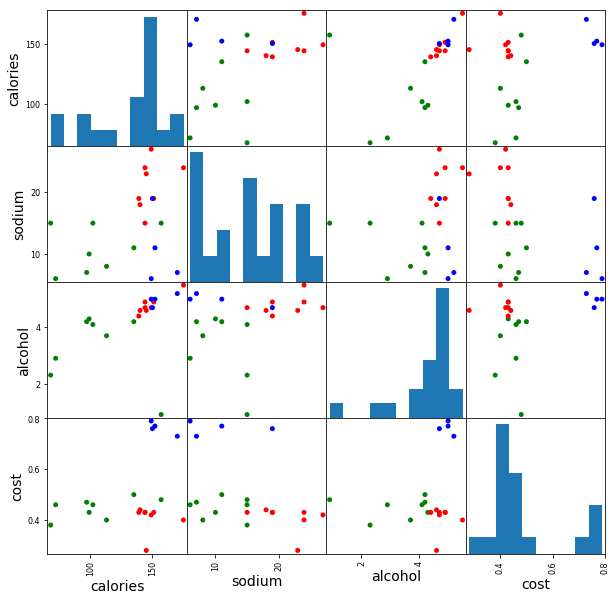

In [18]:
pd.scatter_matrix(X, c=colors[beer.scaled_cluster], alpha=1, figsize=(10,10), s=100)

### 聚类评估：轮廓系数

In [19]:
score_scaled = metrics.silhouette_score(X, beer.scaled_cluster)
score = metrics.silhouette_score(X, beer.cluster1)
print(score_scaled, score)

0.1797806808940007 0.6917656034079486


In [20]:
scores = []

for k in range(2, 20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X, labels)
    scores.append(score)

scores

[0.6917656034079486,
 0.6731775046455796,
 0.5857040721127795,
 0.422548733517202,
 0.4559182167013377,
 0.43776116697963124,
 0.38946337473125997,
 0.39746405172426014,
 0.3915697409245163,
 0.41282646329875183,
 0.3459775237127248,
 0.31221439248428434,
 0.30707782144770296,
 0.31834561839139497,
 0.2849514001174898,
 0.23498077333071996,
 0.1588091017496281,
 0.08423051380151177]

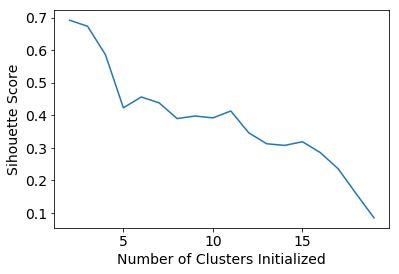

In [21]:
plt.plot(list(range(2, 20)), scores)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")

## 2. DBSCAN

In [22]:
db = DBSCAN(eps=10, min_samples=2).fit(X)
labels = db.labels_

In [23]:
beer['cluster_db'] = labels
beer.sort_values('cluster_db')

,name,calories,sodium,alcohol,cost,cluster1,cluster2,scaled_cluster,cluster_db
9,Budweiser_Light,113,8,3.7,0.40,1,0,1,-1
3,Kronenbourg,170,7,5.2,0.73,0,1,2,-1
6,Augsberger,175,24,5.5,0.40,0,1,0,-1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1,0,0
16,Hamms,139,19,4.4,0.43,0,1,0,0
14,Kirin,149,6,5.0,0.79,0,1,2,0
13,Becks,150,19,4.7,0.76,0,1,2,0
12,Michelob_Light,135,11,4.2,0.50,0,1,1,0
10,Coors,140,18,4.6,0.44,0,1,0,0
0,Budweiser,144,15,4.7,0.43,0,1,0,0


In [24]:
beer.groupby('cluster_db').mean()

,calories,sodium,alcohol,cost,cluster1,cluster2,scaled_cluster
cluster_db,,,,,,,
-1,152.666667,13.000000,4.800000,0.510000,0.333333,0.666667,1.000000
0,146.250000,17.250000,4.383333,0.513333,0.000000,1.000000,0.666667
1,99.333333,10.666667,4.200000,0.453333,1.000000,0.000000,1.000000
2,70.000000,10.500000,2.600000,0.420000,1.000000,2.000000,1.000000


C:\Users\18917\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020232DEB6A0>,
      dtype=object)

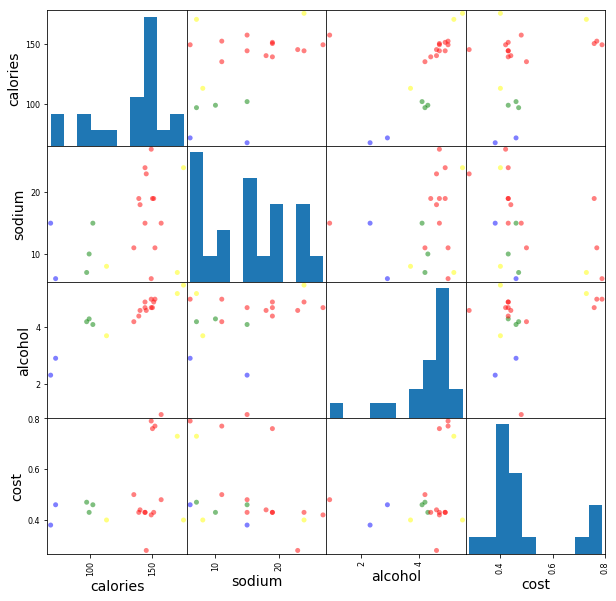

In [25]:
pd.scatter_matrix(X, c=colors[beer.cluster_db], figsize=(10,10), s=100)